<a href="https://colab.research.google.com/github/mtkoroglu/gumushane-eem-222-302/blob/main/code/circuit_numerical_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Devre Analizi Örneği (Nümerik Çözüm)**
Aşağıda şeması verilen devrede $V_{R_1}$, $V_{R_2}$ ve $V_{R_3}$ voltajlarını bulmak istiyoruz. Tabi $\displaystyle \frac{1}{R_{eş}} = \frac{1}{R_2}+\frac{1}{R_3}$ formülüyle $R_2$ ve $R_3$ dirençlerinin eşdeğer direnci bulunabilir ve gerilim bölücü devre mantığı kullanılarak her bir direncin üzerine düşen voltaj hesaplanabilir. Ancak biz burada devreye Kirchoff'un voltaj ve akım yasalarını uygulayarak denklemler elde edip çözümü doğrusal cebir dersinde öğrendiğimiz matris ve vektör gösterimlerini kullanarak elde etmek istiyoruz.

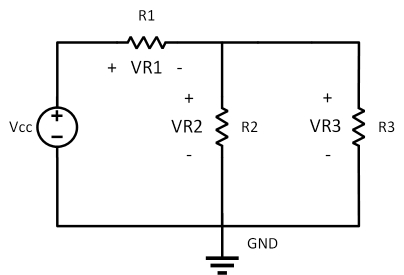

Devrede Kirchoff'un voltaj ve akım kanunlarını uygulayarak aşağıdaki doğrusal denklemleri elde ederiz.

$-V_{cc}+V_{R_1}+V_{R_2} = 0$

$-V_{R_2}+V_{R_3} = 0$

$\displaystyle \frac{V_{cc}-V_{R_2}}{R_1} - \frac{V_{R_2}}{R_2} - \frac{V_{R_2}}{R_3} = 0$

Bu doğrusal denklem sistemini matris eşitliği haline getirelim.

$\begin{pmatrix} 1 & 1 & 0 \\ 0 & -1 & 1 \\ 0 & \displaystyle\frac{1}{R_1}+\frac{1}{R_2}+\frac{1}{R_3} & 0\end{pmatrix} \begin{pmatrix}V_{R_1} \\ V_{R_2} \\ V_{R_3}\end{pmatrix} = \begin{pmatrix} V_{cc} \\ 0 \\ \displaystyle\frac{V_{cc}}{R_1}\end{pmatrix}$

Burada soldaki 3x3'lük matrisi A, aradığımız voltaj değerlerinden oluşan vektörü $\mathbf{x}$ ve eşitliğin sağ tarafındaki vektörü $\mathbf{t}$ olarak tanımlarsak o zaman denklem $A\mathbf{x} = \mathbf{t}$ haline gelir. İkinci haftada bu denklemin **analitik** çözümünü denklemin her iki tarafını ($V_{cc} = 12V$, $V_{R_1} = 9 \Omega$, $V_{R_2} = 4 \Omega$ ve $V_{R_3} = 12 \Omega$) değerleri için soldan A matrisinin tersi ile çarparak

$\mathbf{x^*} ≜\begin{pmatrix} V_{R_1}^* \\ V_{R_2}^* \\ V_{R_3}^* \end{pmatrix} = \begin{pmatrix} 9 \\ 3 \\ 3\end{pmatrix}$

olarak elde etmiştik. Bu hafta ise aradığımız $\mathbf{x^*}$ çözümünü tek hamlede değil de iterasyonlarla yani nümerik olarak elde etmeye çalışacağız.

## Nümerik Çözüm
Diğer çoğu nümerik yaklaşımda olduğu gibi Kayıp Fonksiyonu (İng. Loss Function) denilen bir fonksiyon tanımlayıp bu fonksiyonu minimize edeceğiz. Aynı zamanda Maliyet Fonksiyonu (İng. Cost Function) olarak da bilinen kayıp fonksiyonu, tasarladığımız formülle adım adım minimize edilebilirse o zaman bizim çözüm olarak aradığımız değerler/parametreler optimize olur. İterasyonların bir şekilde sonlanmasıyla adım adım güncellediğimiz değerler de son halini almış olur. Aşağıda verilen blok diyagram kabaca bu süreci anlatmaktadır.

<img src="https://drive.google.com/uc?id=1-p6J0qD20QoipXK1Bxyg8Nttr64KZ2sf" alt="devre örneği nümerik çözüm" height="240"/>

Şekilde A ve **t** sabit ve bildiğimiz değerler. Optimal değerini aradığımız **x** için ister kendimizin belirlediği ister de rasgele (İng. random) olan bir **başlangıç koşulu** (İng. initial condition) $\mathbf{x_0}$
belirlememiz gerekecek. Genelde optimizasyon problemlerinde parametrelerin ilk değerleri olan başlangıç koşulları rasgele belirlenir. Belirlenen başlangıç koşulu $\mathbf{x_0}$ doğal olarak $\mathbf{x^*}$'a eşit olmayacağı için en başta **y** vektörü **t**'ye eşit olmayacaktır ve dolayısıyla hata vektörü $\mathbf{e} ≜ \mathbf{t} - \mathbf{y}$ sıfırdan farklı elemanlara sahip olacaktır. Burada optimize etmeye çalıştığımız değerlerde gözlemlenen hataların her biri hata vektörünün elemanlarıdır. Yani 

$\mathbf{t} = \begin{pmatrix} t_1 \\ t_2 \\ t_3 \end{pmatrix}$

ve 

$\mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \\ y_3 \end{pmatrix}$

olarak verilirse o zaman hata vektörü

$\mathbf{e} ≜ \mathbf{t} - \mathbf{y} = \begin{pmatrix} t_1-y_1 \\ t_2-y_2 \\ t_3-y_3 \end{pmatrix}$

olmuş olur. Burada hata vektörünün bütün elemanlarını ayrı ayrı sıfırlamaya çalışırsak o zaman eleman sayısı kadar kayıp fonksiyonu tanımlamış oluruz. Bunun yerine kayıp fonksiyonunu hataların toplamı olarak tanımlarsak o zaman tek bir fonksiyonla işimizi görmüş oluruz fakat derste de üzerinde durduğumuz gibi bazen bazı hatalar birbirlerini sıfırlayabilir ve bizi yanıltabilir. Mesela, bildiğimiz gibi 

$\mathbf{x_0} ≜ \begin{pmatrix} V_{R_1}^* \\ V_{R_2}^* \\ V_{R_3}^*\end{pmatrix} = \begin{pmatrix} 9 \\ 3 \\ 3\end{pmatrix}$ 

olarak analitik çözüm yoluyla bulunmuştu. Nümerik çözümde daha iterasyonlara bile başlamadan başlangıç koşulunu $\mathbf{x_0} = \begin{pmatrix} 7 & 5 & 3\end{pmatrix}$ olarak seçsek o zaman $\mathbf{e_0} = \begin{pmatrix} 2 & -2 & 0\end{pmatrix}$ olur ki bu durumda hataların toplamı sıfır olmuş olur. O zaman hata sıfır yani $\mathbf{t} = \mathbf{y}$ durumu olur ve sanki optimal değerleri elde etmiş gibi işlemleri durdururduk. Ancak biliyoruz ki burada birinci hata ikincisini bizi yanıltacak bir biçimde sıfırlamış oldu. İşte bu yüzden kayıp fonksiyonunu hataların toplamı yerine hataların karelerinin toplamı olacak şekilde tanımlamak hataların birbirini götürüp bizi yanıltmasını engelleyecektir. Aynı zamanda kayıp fonksiyonunu tek bir fonksiyon olarak tanımlanabilecektir. Böylece hataların karelerini minimize etmeye çalışacağız ki buna **en küçük kareler** (İng. least squares) yaklaşımı denmektedir. Böylece kayıp fonksiyonu  

$L = \displaystyle \sum_{i=1}^n e_i^2$ 

haline gelir (burada $n = 3$). Aynı ifade olmasa da vektör formatında 

$L = \displaystyle \frac{1}{2} \mathbf{e}^2$ 

olarak gösterilebilir. Burada hatanın karesinin önüne $\displaystyle \frac{1}{2}$ katsayısını koymamızın sebebi derste de bahsettiğimiz gibi nümerik çözüm formüllerini türetirken kayıp fonksiyonunun türevini alacak olmamız. Bu şekilde daha sade ifadelerle karşılaşmış olacağız. Özetlemek gerekirse

$A\mathbf{x} = \mathbf{y}$

$\mathbf{e} = \mathbf{t} - \mathbf{y}$

$L = \displaystyle \frac{1}{2} \mathbf{e}^2$

ifadelerini elde ettik. Bu formülasyonu kullanarak yukarıda şekilde görüldüğü gibi $\mathbf{x}$ değerlerini güncelleyecek $\Delta \mathbf{x}$ adımını hesaplayıp $\mathbf{x}$'e ekleyeceğiz.

$\mathbf{x_{k+1}} = \mathbf{x_k} + \Delta \mathbf{x}$

Burada $k$ fihristi iterasyon numarasını gösteriyor. Şu anda yapmak istediğimiz şey her adımda mantıklı bir şekilde $\Delta \mathbf{x}$'i hesaplamak. 

### Eğim Düşümü (Gradient Descent) Metodu
Kayıp fonksiyonunu optimal değerlerini aradığımız değişken $\mathbf{x}$ cinsinden yazacak olursak 

$L = \displaystyle \frac{1}{2} (\mathbf{t} - A\mathbf{x})^2$ 

olur ki bu ifade de ikinci dereceden bir denklemdir (yani bir paraboldür). Kayıp fonksiyonunu çizecek olursak kabaca

<img src="https://drive.google.com/uc?id=1oSYnE4rsbzrRNH9rQa0k0UHxS3ElgosI" alt="kayıp fonksiyonu" height="240"/>

şeklinde olacaktır. Herhangi bir $\mathbf{x_k}$ değeri için bu fonksiyonun üzerinde olduğumuzu düşünün. Değişimi temsil eden $\displaystyle \frac{\partial L}{\partial \mathbf{x_k}}$ ifadesi sağ tarafta pozitif, sol tarafta ise negatiftir. Bizim amacımız her adımda $\mathbf{x}$'i güncelleyerek L'yi minimize etmek. Soldayken yani $\mathbf{x} < \mathbf{0}$ durumunda $\displaystyle \frac{dL}{d\mathbf{x_k}}$ negatif, dolayısıyla sağa doğru hareket edilmeli ki $L_{k+1} < L_k$ olsun. Benzer bir biçimde, sağdayken $\displaystyle \frac{dL}{d\mathbf{x_k}}$ pozitif. Yine $\displaystyle \frac{dL}{d\mathbf{x_k}}$'in işaretinin ters yönünde güncellemeyi yapacağız. Yani bu sefer de sola doğru gideceğiz ki $L_{k+1} < L_k$ olsun. 
#### Adım Boyu (Step Size) Seçimi 
Güncellemenin yönünü doğru belirledik ama adım boyunu da belirlememiz gerekir. Adım boyu dediğimiz $\alpha$ parametresi genelde $0 < \alpha < 1$ aralığında seçilir. Eğer adımlarımızı çok büyük seçersek optimal değerlerin üzerinden atlayabiliriz ve ihtimal hiç bir zaman $\mathbf{x^*}$'a yakınsamayabiliriz. Çok da küçük seçersek bu sefer de optimizasyon iterasyon sayısı bakımından uzun sürer. Sonuç olarak güncelleme ifadesi aşağıdaki halini alır.

$\mathbf{x_{k+1}} = \mathbf{x_k} + \Delta \mathbf{x_k}$

Burada $\Delta\mathbf{x_k}$'yı yerine koyarsak 

$\mathbf{x_{k+1}} = \mathbf{x_k} - \alpha \displaystyle \frac{\partial L}{\partial \mathbf{x_k}}$

olur. Daha önceden Kayıp fonksiyonu $L$'yi hata $\mathbf{e}$ cinsinden, hata $\mathbf{e}$'yi $\mathbf{y}$ ve $\mathbf{y}$'yi de $\mathbf{x}$ cinsinden aşağıdaki gibi tanımlamıştık.

$L = \displaystyle \frac{1}{2} \mathbf{e}^2$

$\mathbf{e} = \mathbf{t} - \mathbf{y}$

$A\mathbf{x} = \mathbf{y}$

Bu halde güncelleme ifadesinde zincir kuralını uygularsak 

$\mathbf{x_{k+1}} = \mathbf{x_k} - \alpha \displaystyle \frac{\partial L_k}{\partial \mathbf{e_k}} \frac{\partial \mathbf{e_k}}{\partial \mathbf{y_k}} \frac{\partial \mathbf{y_k}}{\partial \mathbf{x_k}}$ 

Burada alt fihrist $k$ sırasıyla kayıp fonksiyonu, hata, çıkış ve aranan değerlerin o andaki değerlerine işaret etmektedir. Elde edilen son ifadede kısmi türev içeren terimleri hesaplayalım.

$\displaystyle L = \displaystyle \frac{1}{2} \mathbf{e}^2 \rightarrow \frac{\partial L}{\partial \mathbf{e}} = \mathbf{e}$

$\displaystyle \mathbf{e} = \mathbf{t} - \mathbf{y} \rightarrow \frac{\partial \mathbf{e}}{\partial \mathbf{y}} = -1$

$\displaystyle A\mathbf{x} = \mathbf{y} \rightarrow \frac{\partial \mathbf{y}}{\partial \mathbf{x}} = A$

Türettiğimiz sonuçları Eğim Düşümü metodu ile elde ettiğimiz güncelleme formülünde yerine koyarsak güncelleme ifadesi devre analizi örneğinin nümerik çözümü için 

$\mathbf{x_{k+1}} = \mathbf{x_k} - \alpha \displaystyle \mathbf{e_k} (-1) A$ 

halini alır. Burada $\mathbf{e}$'nin yerine $\mathbf{t} - A\mathbf{x}$ koyup ifadeyi matris çarpımları doğru olacak şekilde düzenlersek 

$\mathbf{x_{k+1}} = \mathbf{x_k} + \alpha \displaystyle A (\mathbf{t} - A\mathbf{x_k})$ 

ifadesine ulaşmış oluruz. Elde ettiğimiz bu formülü 

$\mathbf{x_0} = \begin{pmatrix} 2 \\ 0.5 \\ 0.5\end{pmatrix}$

$n=100$ 

$\alpha = 0.5$

olacak şekilde Python'da koşturursak aşağıdaki grafiği elde ederiz.

In [ ]:
import numpy as np
import matplotlib